In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys,time

In [2]:
n_subsets = 30

In [3]:
df = pd.read_csv(f"n_sign_genes_mean_{n_subsets}subsets_separate.csv")
df

,cohort,n_sign_genes_mean,n_sign_genes_std_error
0,KIRC,3987,160
1,KIRP,3958,64
2,LUSC,1478,83
3,LUAD,3009,82
4,BRCA,5139,117
5,LGG,5553,162
6,PRAD,3889,103
7,HNSC,3058,69
8,COAD,3440,98
9,STAD,3425,72


In [4]:
mean = df["n_sign_genes_mean"].values
print("mean:", mean)

std_error = df["n_sign_genes_std_error"].values
print("std_error:", std_error)

mean: [3987 3958 1478 3009 5139 5553 3889 3058 3440 3425 2124]
std_error: [160  64  83  82 117 162 103  69  98  72  32]


In [5]:
cohorts = df["cohort"].values
print(cohorts)
print(len(cohorts))

['KIRC' 'KIRP' 'LUSC' 'LUAD' 'BRCA' 'LGG' 'PRAD' 'HNSC' 'COAD' 'STAD'
 'CESC']
11


In [7]:
#x_labels = df["cohort"].values
#x_labels = ["Kidney (N=837)", "Lung (N=929)", "Breast (N=1043)", "LGG (N=479)", "Prostate (N=391)", 
#            "Head&Neck (N=419)", "COAD (N=370)", "STAD (N=281)", "Cervical (N=261)"]

#x_labels = ["Kidney", "Lung", "Breast", "LGG", "Prostate", 
#            "Head&Neck", "COAD", "STAD", "Cervical"]

#x_labels = df["cohort"].values

#x_labels = ["KIRC (n=200)", "KIRP (n=200)", "LUSC (n=200)", "LUAD (n=200)", "BRCA (n=200)", "LGG (n=200)", 
#            "PRAD (n=200)", "HNSC (n=200)", "COAD (n=200)"]

x_labels = np.array([f"{x} (n=200)" for x in cohorts])

print(x_labels)
print(len(x_labels))

['KIRC (n=200)' 'KIRP (n=200)' 'LUSC (n=200)' 'LUAD (n=200)'
 'BRCA (n=200)' 'LGG (n=200)' 'PRAD (n=200)' 'HNSC (n=200)' 'COAD (n=200)'
 'STAD (n=200)' 'CESC (n=200)']
11


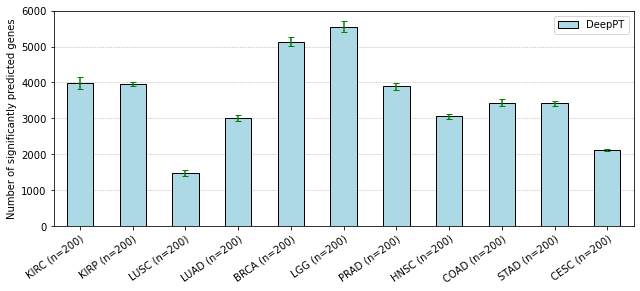

In [11]:
nx,ny = 1,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*9,ny*4.15))

n_bars = len(x_labels)
    
#x_labels = ["Breast (N=1106)", "Lung (N=1018)", "LGG (N=805)" , "GBM (N=210)", "Kidney (N=859)", "COAD (N=374)", \
#            "READ (N=140)","Prostate (N=438)", "STAD (N=302)", "ESCA (N=131)", "Head&Neck (N=430)", \
#            "Cervical (N=261)", "Pancreas (N=195)"]
    
hatch2 = "//"
for i in range(n_bars):
    #if i == 0:
    #    ax.bar(i-0.2,n_genes_p005[i],color="lightblue",edgecolor="black",width=0.4, label="cross validation in TCGA")
    #else:

    #if i == 0:
        #ax.bar(i-0.2,n_sign_genes_HE2RNA[i],color="white",edgecolor="black",hatch=hatch2,width=0.4,label="HE2RNA")
    #else:
    #    ax.bar(i-0.2,n_sign_genes_HE2RNA[i],color="white",edgecolor="black",hatch=hatch2,width=0.4)
        
    if i == 0:
        ax.bar(i,mean[i],yerr=std_error[i],color="lightblue",
               edgecolor="black",ecolor='green',capsize=3,width=0.5, label="DeepPT")
    else:
        ax.bar(i,mean[i],yerr=std_error[i],color="lightblue",
               edgecolor="black",capsize=3,ecolor='green',width=0.5)
        
ax.set_xticks(np.arange(n_bars))
ax.set_yticks(np.arange(0,22000,1000))

ax.set_xticklabels(x_labels, rotation = 35, ha='right', rotation_mode='anchor')
#ax.set_ylabel("#Genes with adjusted p-value < 0.05")
ax.set_ylabel("Number of significantly predicted genes")
ax.legend(ncol=2, loc="upper right")
ax.set_ylim(0,6000)
ax.set_xlim(-0.5,10.5)

ax.yaxis.grid(linestyle='--',linewidth='0.5',zorder=-1)
ax.yaxis.set_zorder(level=-1)
plt.tight_layout(h_pad=1, w_pad= 1.5)

plt.savefig(f"n_sign_genes_mean_{n_subsets}subsets_separate_v2.pdf", format="pdf", dpi=100)